In [35]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [63]:
train = pd.read_csv('data/train.csv', chunksize = 150000) #generator
trained_dfs = []
for i in range(10):
    trained_dfs.append(next(train))

In [64]:
trained_dfs[0].head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [38]:
trained_dfs[0].shape

(150000, 2)

In [39]:
trained_dfs[1].head()

,acoustic_data,time_to_failure
150000,5,1.430797
150001,6,1.430797
150002,8,1.430797
150003,6,1.430797
150004,3,1.430797


In [59]:
train_samp = pd.DataFrame(trained_dfs[0])
earthquake=[0]
train_samp.time_to_failure.isin(earthquake) #time_to_failure does not go to 0

In [61]:
min(trained_dfs[0].time_to_failure)

1.4307971859

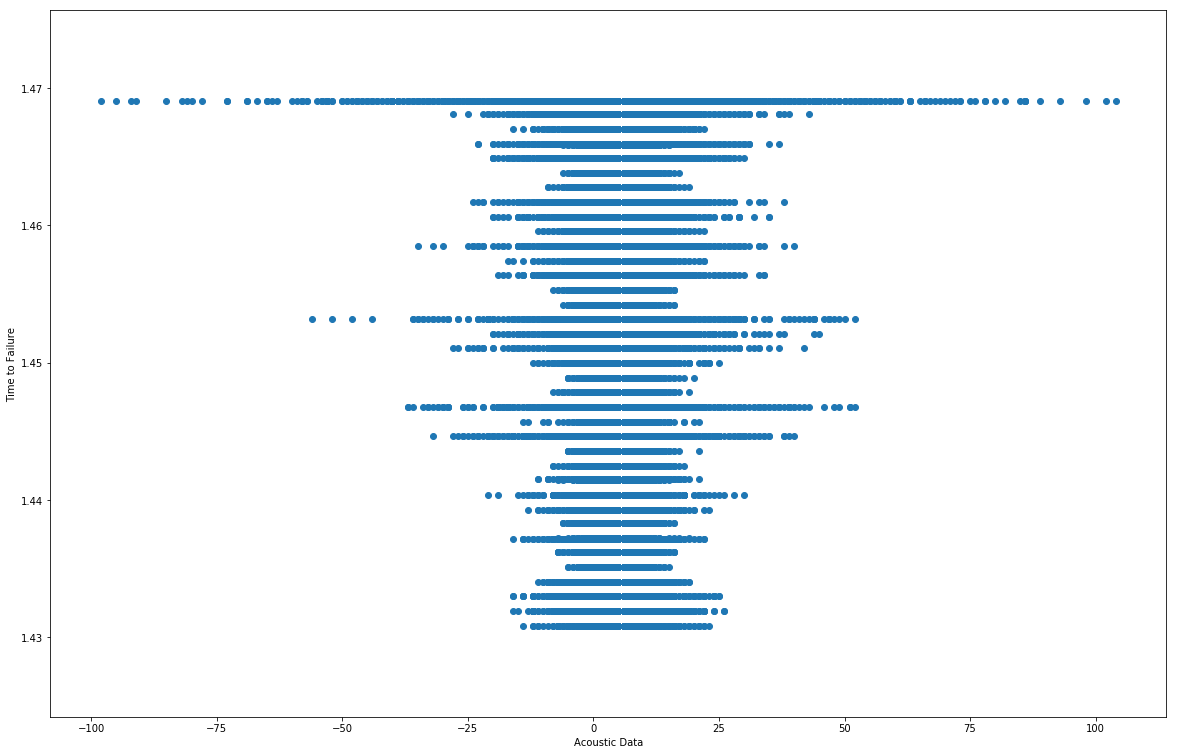

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 13)
plt.scatter(train_samp.acoustic_data,train_samp.time_to_failure,)
plt.xlabel('Acoustic Data')
plt.ylabel('Time to Failure')
plt.show()
# What patterns are observed with the data?
# Earthquake occurs when acoustic data =0
# What patterns exist with the time to failure data and acoustic data... use to predit
# Consider statistics like kurtosis, threshold, 

In [72]:
np.mean(trained_dfs[0].acoustic_data)

4.8841133333333335

In [73]:
min(trained_dfs[0].acoustic_data)

-98

In [114]:
def add_time_column(df,increment=0.000000250):
    times=[]
    set_value=0
    for i in range(0,len(df)):
        times.append(set_value)
        set_value+=increment
    return times

In [115]:
trained_dfs[0]['experimental_run_time']=add_time_column(trained_dfs[0])
trained_dfs[0].head()

,acoustic_data,time_to_failure,experimental_run_time
0,12,1.4691,0.000000e+00
1,6,1.4691,2.500000e-07
2,8,1.4691,5.000000e-07
3,5,1.4691,7.500000e-07
4,8,1.4691,1.000000e-06


In [129]:
for i in range(len(trained_dfs)):
    trained_dfs[i]['experimental_run_time']=add_time_column(trained_dfs[i])
    trained_dfs[i]['ID']=trained_dfs[i].index

trained_dfs[1].head()

,acoustic_data,time_to_failure,experimental_run_time,index,ID
150000,5,1.430797,0.000000e+00,150000,150000
150001,6,1.430797,2.500000e-07,150001,150001
150002,8,1.430797,5.000000e-07,150002,150002
150003,6,1.430797,7.500000e-07,150003,150003
150004,3,1.430797,1.000000e-06,150004,150004


In [136]:
rolling_tide=trained_dfs[1].rolling(150,on='experimental_run_time').ID.count()
df_rolling=pd.DataFrame(rolling_tide).reset_index()
df_rolling.head()

,index,ID
0,150000,1.0
1,150001,2.0
2,150002,3.0
3,150003,4.0
4,150004,5.0


In [ ]:
#rollingjobs=pu3.groupby('User').rolling('14400s', on='Submit').JobIDRaw.count()#Why does it change the JobIDRaw